In [2]:
# HIDDEN
#Importing packages
from datascience import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import patches
%matplotlib inline

<table style="width: 100%;">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Environmental Data Analysis</strong>, Fall 2022<br>
            Peter F. Grinde-Hollevik<br>
            Dr. Eric Van Dusen<br>
            Ray Zhou
        </p></td></tr>
</table>

# LAB 8: Environmental Kuznets Curve Hypothesis

The Environmental Kuznets curve hypothesis is that the economic development of a nation is associated with a downward-facing U-shape of environmental degradation.

The Y-axis is in terms of the level of environmental degradation (e.g pollution, water quality, deforestation.  The X-axis would be the GDP/capita.  

The idea is that the environmental degradation worsens until a certain level of income and reach a tipping point where we pollute less per capita.

In the US this could be seen in terms of air or water quality, where the skies or rivers were very polluted in the 1960s, until the Clean Air Act and Clean Water Act were passed and Air Quality and Water Quality improved.  Another motivation for the downward slope would be the idea that at some point a wealthier society demands environmental improvements. Hence, we assume that a clean environment is a a *normal good* in our model.

However - could this hold for the potentially most important Pollutant C02, the main driver of anthropogenic climate change? With impacts of global CO2 pollution not always experienced locally, it is not clear whether the Environmental Kuznets hypothesis will hold.  

Today, we'll aim to build an C02 Kuznets curve for an *association* between the amount of CO2 emitted per capita (t/CO2) and the growing GDP per capita (USD). This dataset is collected from Our World in Data, a great source of all sorts of data types!



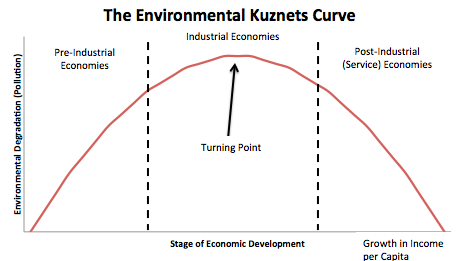

## Building our own Environmental Kuznets Curve

In this lab, we start by importing data on GDP per capita and Per Capita CO2 emissions for every country in the world for as long as it has been recorded. In first part, we show you how to perform the analysis, and let you do one of your own as an exercise.

In [5]:
# Import data
co2_table = Table.read_table('co2-emissions-vs-gdp.csv').drop('145446-annotations','Total population (Gapminder, HYDE & UN)','Code')
co2_table = co2_table.relabeled('Entity', 'Country')
co2_table

Country,Year,Per capita CO2 emissions,GDP per capita,Continent
Abkhazia,2015,nan,nan,Asia
Afghanistan,1949,0.00191237,nan,nan
Afghanistan,1950,0.010871,1156,nan
Afghanistan,1951,0.0116837,1170,nan
Afghanistan,1952,0.0115423,1189,nan
Afghanistan,1953,0.0132159,1240,nan
Afghanistan,1954,0.0130359,1245,nan
Afghanistan,1955,0.0186057,1246,nan
Afghanistan,1956,0.0218121,1278,nan
Afghanistan,1957,0.0343433,1253,nan


### Low Income Countries
Let’s start by selecting a set of Low Income Countries to graph the movement of CO2 intensity.

<Figure size 2000x1500 with 0 Axes>

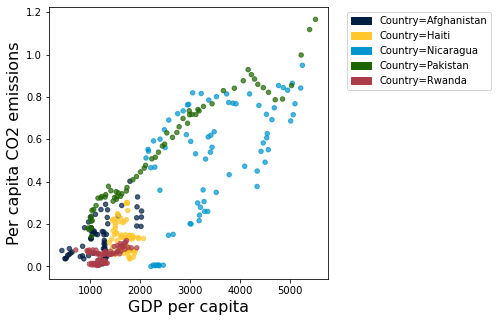

In [3]:
#Low-Income Nations
LIH_array = make_array('Haiti', 'Afghanistan','Rwanda','Pakistan', 'Nicaragua')
LIH_table = co2_table.where('Country', are.contained_in(LIH_array))
LIH_table = LIH_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
plt.figure(figsize = (8,6), dpi=250)
LIH_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Country') 

### BRICS  
Lets look at the BRICS countries, the rapidly growing upper middle income countries

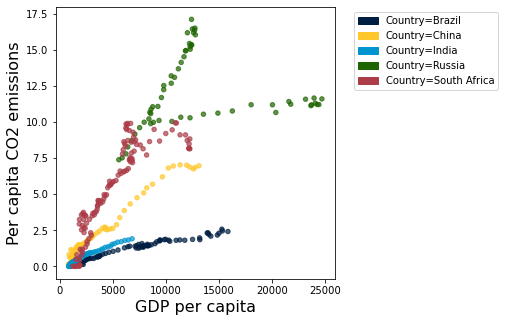

In [4]:
BRICS_array = make_array('Brazil','Russia','India','China','South Africa')
BRICS_table = co2_table.where('Country', are.contained_in(BRICS_array))
BRICS_table = BRICS_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
BRICS_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Country')

The BRICS nations seem to have a variety of development pathways but all show the linear trend of increasing emissions as wealth grows.  
- Russia has an interesting dip while GDP per capita decrease and then increase again
- South Africa has a recent period where growth in both GDP per capita and CO2 per capita have stagnated
- China and India show linearly increasing trends, with China both wealthier and more CO2 intensive

### High Income Nations
Let’s look at a set of other High Income Nations:

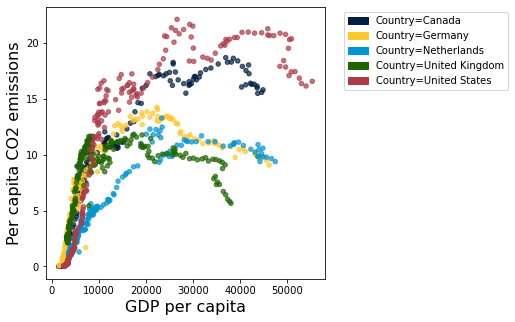

In [18]:
HIN_array = make_array('United States', 'Netherlands', 'United Kingdom','Germany','Canada')
HIN_table = co2_table.where('Country', are.contained_in(HIN_array))
HIN_table = HIN_table.where('GDP per capita', are.above_or_equal_to(0)).where('Per capita CO2 emissions', are.above_or_equal_to(0))
HIN_table.scatter('GDP per capita', 'Per capita CO2 emissions',group='Country')

Here we see evidence for an Environmental Kuznets Curve.



## Individual country graphs
Lets look at some individual countries, starting with the US.   
We can plot both total and logged quantities

**Question 1:** Write a function that generates a total and logged Environmental Kuznets Curve for any country of choice.

In [ ]:
def Kuznets(country):
    country_tbl = ...
    country_tbl.scatter(...)
    plt.title('Environmental Kuznets Curve for ' + country)
    
    log_tbl = Table().with_columns('LogGDP', ..., 'LogCO2', ...)
    log_tbl.scatter(...)
    plt.title('Log Environmental Kuznets Curve for ' + country)

**Question 2:** Using the function above, generate an Environment Kuznets curve for the United States.

In [2]:
# Your code here...

**Question 3:** Why might the Environmental Kuznets curve have an inverted ‘U’ shape?

*Enter your answer here...*

**Question 4:** Generate an Environmental Kuznets curve for a country of your choice

In [1]:
# Your code here...

**Question 5:** What do you observe? Does the data prove or disprove our hypothesis? Why or why not?

*Enter your answer here...*

**Question 6:** Why do nations with different levels of economic development have different enviromental Kuznets curves? How does economic development affect the relationship of CO2 emissions to GDP per capita?

*Enter your answer here...*

**Question 7:** What are two potential issues of our assumption for the Environmental Kuznets curve? Describe each in 2 sentences.

*Enter your answer here...*

**Question 8:** How might implementing emissions abatement technologies be more beneficial compared to the Business-as-Usual (BAU) alternative?

*Enter your answer here...*

**Congratulations! You finished Lab 8!**